In [1]:
from functools import partial
from fvhoe.boundary_conditions import BoundaryCondition
from fvhoe.hydro import advection_dt
from fvhoe.initial_conditions import sedov_blast
from fvhoe.solver import EulerSolver
import matplotlib.pyplot as plt
import numpy as np

In [2]:
N = 64
p = 3
solver = EulerSolver(
    w0=partial(sedov_blast, radius=0.05, Pmin_Pmax=(0.2, 1)),
    bc=BoundaryCondition(x="free", y="free"),
    CFL=0.8,
    nx=N,
    ny=N,
    px=p,
    py=p,
    riemann_solver="llf",
    a_posteriori_slope_limiting=True,
    slope_limiter="minmod",
    cupy=True,
)

In [3]:
solver.rkorder(0.4)

100%|██████████| 0.4/0.4 [00:24]                 


t=0.40, x=[0.01, 0.99], y=[0.01, 0.99], z=0.50
horizontal_axis='x', vertical_axis='y'
t=0.40, x=[0.01, 0.99], y=[0.01, 0.99], z=0.50
horizontal_axis='x', vertical_axis='y'
t=0.40, x=[0.01, 0.99], y=[0.01, 0.99], z=0.50
horizontal_axis='x', vertical_axis='y'
t=0.40, x=[0.01, 0.99], y=[0.01, 0.99], z=0.50
horizontal_axis='x', vertical_axis='y'


Text(0.5, 0, '$x$')

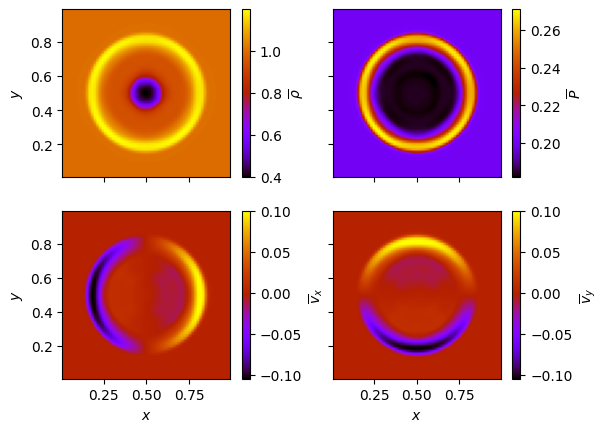

In [4]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)

t = 1

for var, label, idx in zip(
    ["rho", "P", "vx", "vy"],
    [r"$\overline{\rho}$", r"$\overline{P}$", r"$\overline{v}_x$", r"$\overline{v}_y$"],
    [(0, 0), (0, 1), (1, 0), (1, 1)],
):
    im = solver.plot_2d_slice(ax[idx], t=t, param=var, cmap="gnuplot", z=0.5)
    fig.colorbar(im, ax=ax[idx], label=label)

ax[0, 0].set_ylabel("$y$")
ax[1, 0].set_ylabel("$y$")
ax[1, 0].set_xlabel("$x$")
ax[1, 1].set_xlabel("$x$")

In [6]:
for n in [0, -1]:
    m_tot = np.sum(solver.snapshots[0]["fv"].rho[:, 0, 0]) * (
        solver.h[0] * solver.h[1] * solver.h[2]
    )
    print(f"Total mass at time {solver.snapshot_times[n]}: {m_tot}")

Total mass at time 0: 0.015625
Total mass at time 0.4: 0.015625


In [7]:
print(f"min rho at latest snapshot: {np.min(solver.snapshots[-1]['fv'].rho)}")
print(f"max rho at latest snapshot: {np.max(solver.snapshots[-1]['fv'].rho)}")

min rho at latest snapshot: 0.39714018551860475
max rho at latest snapshot: 1.1976145090702826
